<a href="https://colab.research.google.com/github/Kundan-12cod/Kundan-12cod/blob/main/Evaluation_Metrics_and_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#1. Visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

In [9]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:

# Define features and target
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

In [11]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
X_test

,carat,depth,table,x,y,z
1388,0.24,62.1,56.0,3.97,4.00,2.47
50052,0.58,60.0,57.0,5.44,5.42,3.26
41645,0.40,62.1,55.0,4.76,4.74,2.95
42377,0.43,60.8,57.0,4.92,4.89,2.98
17244,1.55,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...
44081,0.50,61.6,59.0,5.06,5.14,3.14
23713,0.25,61.6,57.0,4.05,4.07,2.50
31375,0.31,58.0,62.0,4.42,4.47,2.58
21772,1.23,62.5,54.0,6.85,6.82,4.27


In [13]:
X_train

,carat,depth,table,x,y,z
26546,2.01,58.1,64.0,8.23,8.19,4.77
9159,1.01,60.0,60.0,6.57,6.49,3.92
14131,1.10,62.5,58.0,6.59,6.54,4.10
15757,1.50,61.5,65.0,7.21,7.17,4.42
24632,1.52,62.1,57.0,7.27,7.32,4.53
...,...,...,...,...,...,...
11284,1.05,62.4,59.0,6.48,6.51,4.05
44732,0.47,61.0,55.0,5.03,5.01,3.06
38158,0.33,60.3,58.0,4.49,4.46,2.70
860,0.90,62.8,59.0,6.13,6.03,3.82


In [14]:
y_test

,price
1388,559
50052,2201
41645,1238
42377,1304
17244,6901
...,...
44081,1554
23713,633
31375,761
21772,9836


In [15]:
y_train

,price
26546,16231
9159,4540
14131,5729
15757,6300
24632,12968
...,...
11284,4975
44732,1617
38158,1014
860,2871


In [16]:
# Fit the linear regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [18]:
y_pred

array([ 200.79413447, 2361.44322401, 1051.27692119, ...,  604.32190045,
       7400.29315766, 5694.18353911])

In [19]:
# Calculate residuals
residuals = y_test - y_pred
residuals

,price
1388,358.205866
50052,-160.443224
41645,186.723079
42377,74.074077
17244,-3134.105054
...,...
44081,110.266191
23713,426.299459
31375,156.678100
21772,2435.706842


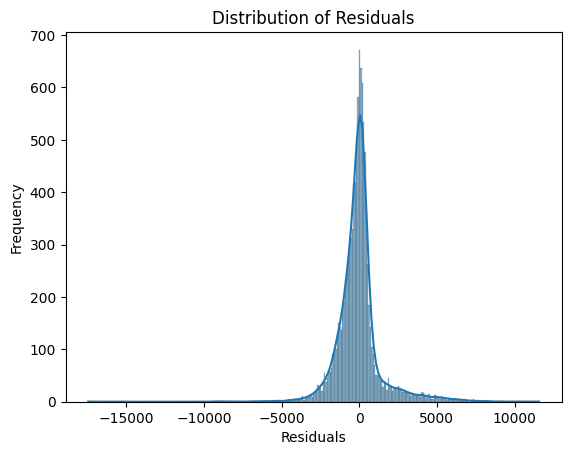

In [20]:
# Create a histogram of the residuals
sns.histplot(residuals, kde=True)
sns.set_style("whitegrid")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [21]:
#2. Calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [26]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 2242178.9040856035
Mean Absolute Error (MAE): 888.4808633901026
Root Mean Squared Error (RMSE): 1497.3906985438382


In [28]:
#3. Check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


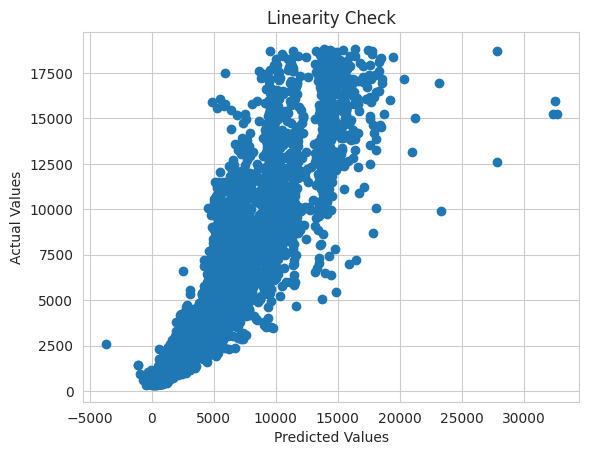

In [30]:
# Check linearity (scatter plot of predicted vs. actual values)
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Linearity Check")
plt.show()


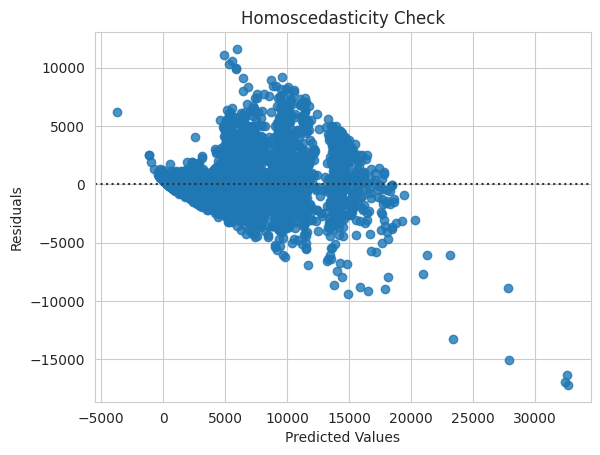

In [31]:
# Check homoscedasticity (residuals plot)
sns.residplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()


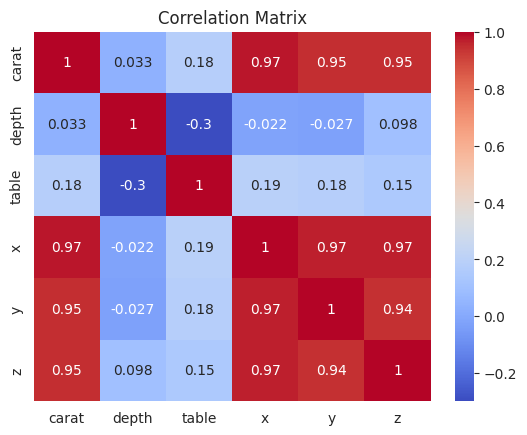

In [32]:
# Check multicollinearity (correlation matrix)
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [33]:
#4. Create a machine learning pipeline with feature scaling and evaluate the performance of different regression models.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [35]:
# Create a pipeline with feature scaling and a regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [36]:
# Create a dictionary of models to evaluate
models = {
    'Linear Regression': pipeline,
    'Support Vector Regression': Pipeline([('scaler', StandardScaler()), ('model', SVR())]),
    'Decision Tree Regression': Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeRegressor())])
}


In [37]:
# Evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse}")


Linear Regression MSE: 2242178.9040856035


KeyboardInterrupt: 

In [38]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.

In [39]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [40]:
# Print coefficients, intercept, and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared Score:", r2_score(y_test, y_pred))


Coefficients: [10683.18425966  -204.09955335  -104.26736872 -1286.79957429
    37.63252069    53.39486424]
Intercept: 20976.563736037213
R-squared Score: 0.8589542625888938


In [41]:

#6. Analyze the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualize the results.

In [42]:
tips = sns.load_dataset('tips')
X = tips[['total_bill']]
y = tips['tip']


In [45]:
model.fit(X,y)

LinearRegression()

In [46]:
y_pred = model.predict(X)

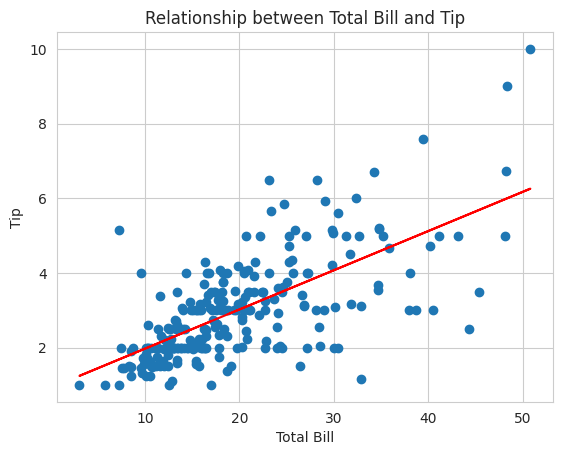

In [47]:
# Visualize the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Relationship between Total Bill and Tip")
plt.show()


In [48]:
#7. Fit a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

In [49]:
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)


In [50]:
model.fit(X,y)

LinearRegression()

In [51]:
# Make predictions on new data
X_new = np.array([[0.2], [0.5], [0.8]])
y_new = model.predict(X_new)


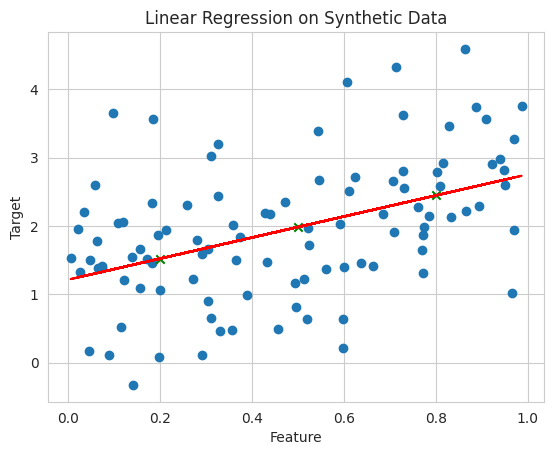

In [52]:
# Plot the results
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.scatter(X_new, y_new, color='green', marker='x')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression on Synthetic Data")
plt.show()


In [53]:
#8. Pickle a trained linear regression model and save it to a file.


In [54]:
import pickle

# Save the trained model to a file
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [56]:
#9. Fit a polynomial regression model (degree 2) to a dataset and plot the regression curve.
# Create polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


In [57]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [59]:
# Make predictions
y_pred = model.predict(X_poly)


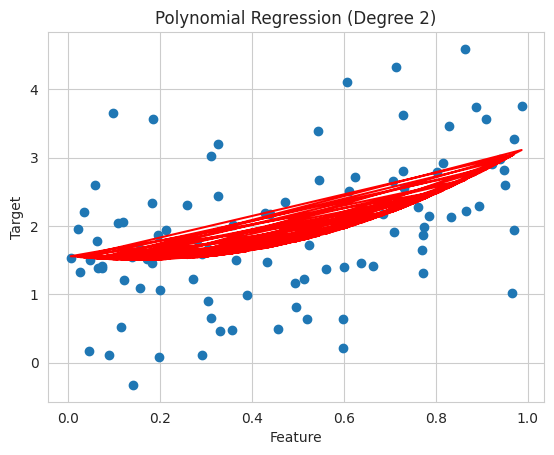

In [60]:
# Plot the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Polynomial Regression (Degree 2)")
plt.show()


In [61]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.


In [62]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)


In [63]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [64]:
# Print coefficients and intercept
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])


Coefficient: 1.540226772876968
Intercept: 1.215096157546748


In [65]:
#11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance

In [66]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**3 + np.random.randn(100, 1)


In [67]:
# Define degrees to test
degrees = [1, 2, 3, 4, 5]
mse_scores = []


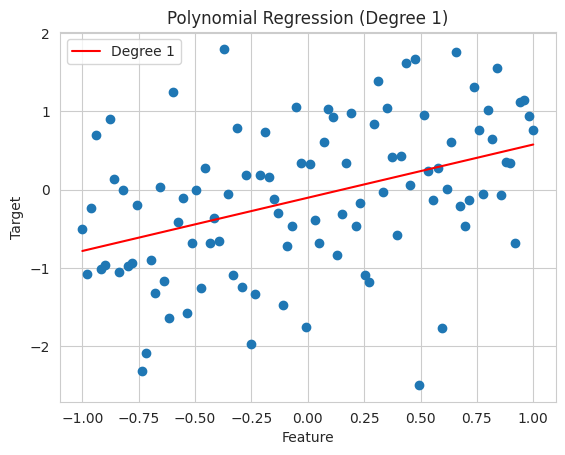

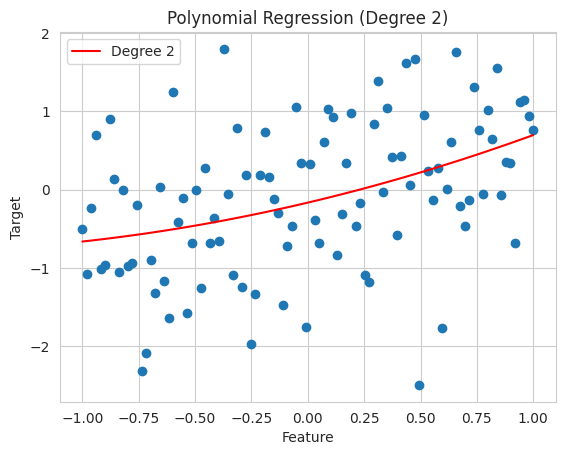

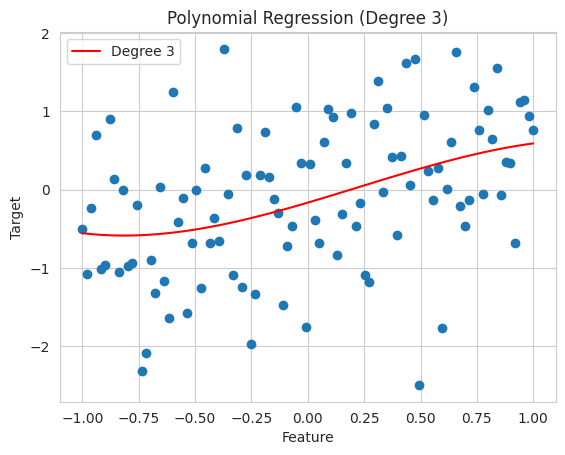

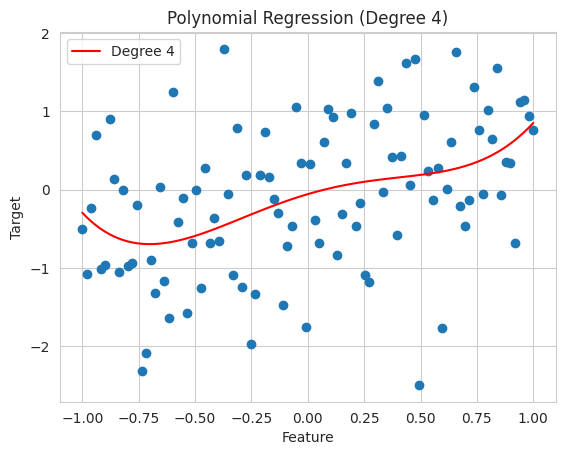

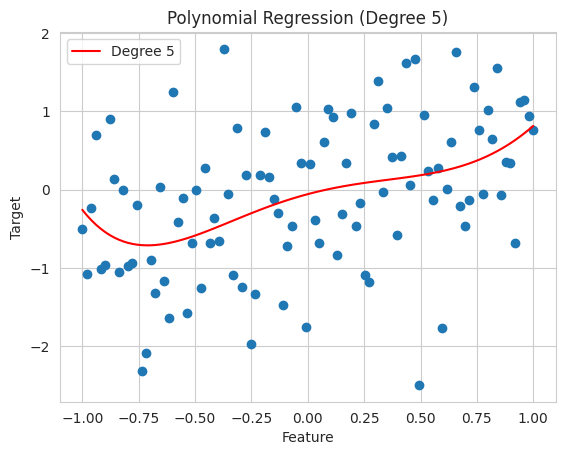

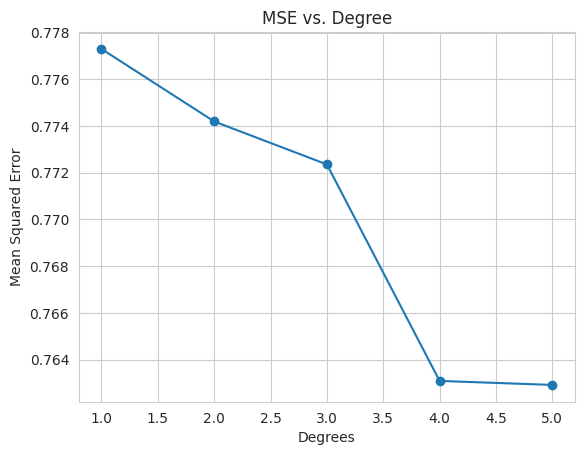

In [82]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**3 + np.random.randn(100, 1)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]
mse_scores = []  # Initialize mse_scores as an empty list before the loop

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)

    # Plot the regression curve (optional)
    plt.figure()
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red', label=f"Degree {degree}")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.legend()

plt.figure()
plt.plot(degrees, mse_scores, marker='o')
plt.xlabel("Degrees")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs. Degree")
plt.show()

In [83]:

    # Calculate MSE
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)


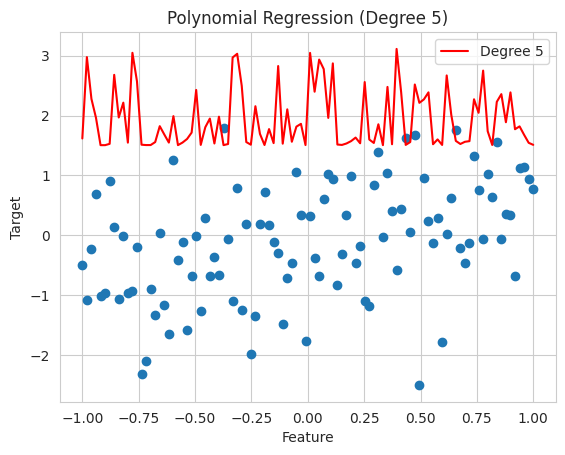

In [75]:
 # Plot the regression curve (optional)
plt.figure()
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', label=f"Degree {degree}")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title(f"Polynomial Regression (Degree {degree})")
plt.legend()


In [84]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.


In [85]:
# Generate synthetic data with two features
np.random.seed(42)
X = np.random.rand(100, 2)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)


In [86]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [87]:
# Print coefficients, intercept, and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared Score:", model.score(X, y))


Coefficients: [2.33866677 3.35494603]
Intercept: -0.22772773589829542
R-squared Score: 0.5811821957321339


In [88]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.


In [89]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)


In [90]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [91]:
# Make predictions
y_pred = model.predict(X)


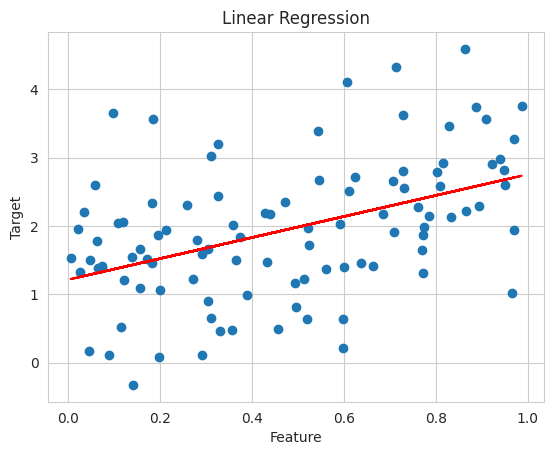

In [92]:
# Visualize the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.show()


In [93]:
#14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [94]:
# Generate synthetic data with correlated features
np.random.seed(42)
X = np.random.rand(100, 3)
X[:, 2] = X[:, 0] + X[:, 1] + np.random.randn(100)


In [95]:
# Create a DataFrame for easier manipulation
data = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3'])


In [99]:
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]


In [100]:
# Create a DataFrame to display VIF values
vif_df = pd.DataFrame({'Feature': data.columns, 'VIF': vif})
print(vif_df)


     Feature       VIF
0  feature_1  2.806224
1  feature_2  2.571846
2  feature_3  2.393166


In [101]:
#15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

In [102]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**4 + np.random.randn(100, 1)


In [103]:
# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)


In [104]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [105]:
# Make predictions
y_pred = model.predict(X_poly)


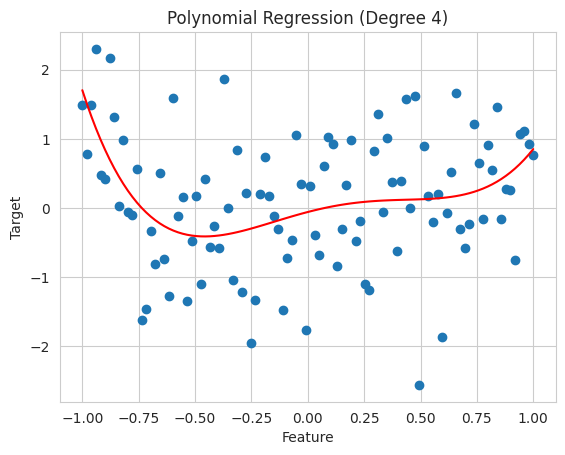

In [106]:
# Plot the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Polynomial Regression (Degree 4)")
plt.show()


In [107]:
#16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [108]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] + X[:, 2] + np.random.randn(100)


In [109]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [110]:
# Fit the pipeline
pipeline.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [111]:
# Make predictions
y_pred = pipeline.predict(X)


In [112]:
# Print R-squared score
print("R-squared Score:", r2_score(y, y_pred))


R-squared Score: 0.6014936944632281


In [113]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve

In [114]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**3 + np.random.randn(100, 1)


In [115]:
# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)


In [116]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_poly, y)


LinearRegression()

In [117]:
# Make predictions
y_pred = model.predict(X_poly)


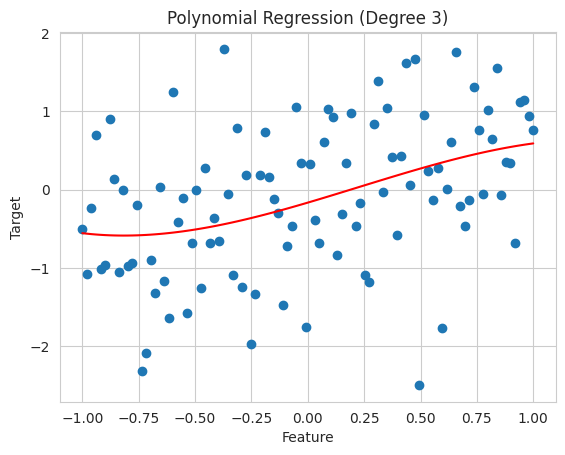

In [118]:
# Plot the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Polynomial Regression (Degree 3)")
plt.show()


In [119]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [120]:
# Generate synthetic data with 5 features
np.random.seed(42)
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 0.5 * X[:, 3] + 4 * X[:, 4] + np.random.randn(100)


In [121]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [122]:
# Print coefficients and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared Score:", model.score(X, y))


Coefficients: [ 1.73705069  2.57543206 -0.53693331  0.53826237  3.68577644]
Intercept: 0.23721193749354308
R-squared Score: 0.6268280024722083


In [123]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

In [124]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)


In [125]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [126]:
# Make predictions
y_pred = model.predict(X)


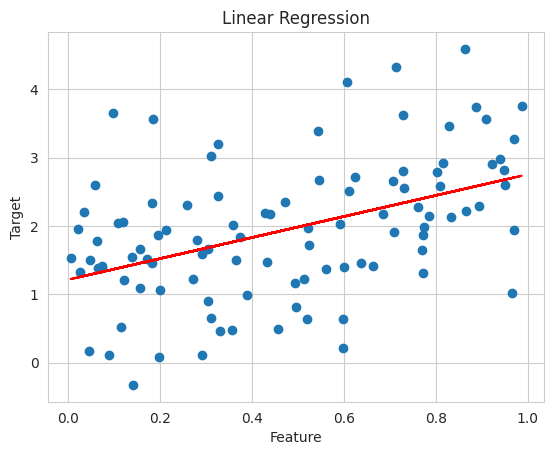

In [127]:
# Visualize the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression")
plt.show()


In [128]:
#20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's R-squared score and coefficients.

In [129]:
# Generate synthetic data with 3 features
np.random.seed(42)
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + np.random.randn(100)


In [130]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [131]:
# Print coefficients and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared Score:", model.score(X, y))


Coefficients: [ 2.27800411  2.84223781 -0.42959424]
Intercept: -0.26498544484225794
R-squared Score: 0.5822862241407263


In [132]:
#21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [135]:
# Generate and fit a model (as in previous examples)
# Serialize the model
import joblib

joblib.dump(model, 'linear_regression_model.joblib')


['linear_regression_model.joblib']

In [136]:
# Deserialize the model
loaded_model = joblib.load('linear_regression_model.joblib')

# Use the loaded model for predictions
y_pred = loaded_model.predict(X)


In [137]:
#22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.


In [146]:
# Load the tips dataset
tips = sns.load_dataset('tips')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline



In [147]:
# Define features and target
X = tips[['sex', 'smoker', 'day', 'time']]
y = tips['tip']


In [148]:
# Create a ColumnTransformer for one-hot encoding
categorical_features = ['sex', 'smoker', 'day', 'time']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Leave numerical features as they are
)


In [149]:

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [150]:
# Fit the pipeline
pipeline.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('regressor', LinearRegression())])

In [151]:
# Make predictions
y_pred = pipeline.predict(X)

# Print the R-squared score
print("R-squared Score:", pipeline.score(X, y))


R-squared Score: 0.02749679020147555


In [156]:
#23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.
from sklearn.linear_model import LinearRegression, Ridge


In [157]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 0.5 * X[:, 3] + 4 * X[:, 4] + np.random.randn(100)


In [158]:

# Fit Linear Regression
lr_model = LinearRegression()
lr_model.fit(X, y)


LinearRegression()

In [159]:
# Fit Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X, y)


Ridge()

In [160]:
# Print results for Linear Regression
print("Linear Regression:")
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)
print("R-squared Score:", r2_score(y, lr_model.predict(X)))


Linear Regression:
Coefficients: [ 1.73705069  2.57543206 -0.53693331  0.53826237  3.68577644]
Intercept: 0.23721193749354308
R-squared Score: 0.6268280024722083


In [161]:

# Print results for Ridge Regression
print("\nRidge Regression:")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("R-squared Score:", r2_score(y, ridge_model.predict(X)))



Ridge Regression:
Coefficients: [ 1.49366972  2.23084508 -0.49826176  0.58323473  3.27377735]
Intercept: 0.6857469911320502
R-squared Score: 0.6186125670999189


In [164]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.
from sklearn.model_selection import cross_val_score


In [165]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + 0.5 * X[:, 3] + 4 * X[:, 4] + np.random.randn(100)

# Create the model
model = LinearRegression()#

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation R-squared scores:", scores)
print("Mean R-squared:", scores.mean())


Cross-validation R-squared scores: [0.24105854 0.6028426  0.59953899 0.71395783 0.57961562]
Mean R-squared: 0.5474027157241302


In [166]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.

In [167]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = X**3 + np.random.randn(100, 1)

# Define degrees to test
degrees = [1, 2, 3, 4, 5]
r2_scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Calculate R-squared score
    r2 = r2_score(y, model.predict(X_poly))
    r2_scores.append(r2)

    # Print results
    print(f"Degree {degree}: R-squared Score = {r2:.4f}")


Degree 1: R-squared Score = 0.1687
Degree 2: R-squared Score = 0.1720
Degree 3: R-squared Score = 0.1740
Degree 4: R-squared Score = 0.1839
Degree 5: R-squared Score = 0.1841
